In [1]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import numpy as np
import sys
import os, time
import platform
import datetime

# Data exploration

### Explore the data, understand the featues, statistics visualize the inputs

### What is Data Exploration?

Data exploration definition: Data exploration refers to the initial step in data analysis in which data analysts use data visualization and statistical techniques to describe dataset characterizations, such as size, quantity, and accuracy, in order to better understand the nature of the data.

https://www.heavy.ai/learn/data-exploration 

### Why Is Data Exploration Important? 

Exploration allows for deeper understanding of a dataset, making it easier to navigate and use the data later. The better an analyst knows the data they're working with, the better their analysis will be.

https://www.alteryx.com/glossary/data-exploration

## Creation and update times of the files

In [2]:
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
min=10000000
max=0
for file in files:
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    print("Last modified: %s" % time.ctime(os.path.getmtime(file)))
    print("Created: %s" % time.ctime(os.path.getctime(file)))

Last modified: Sat Nov  5 16:06:46 2022
Created: Mon Nov 21 19:46:52 2022
Last modified: Sat Nov  5 16:05:12 2022
Created: Mon Nov 21 19:46:48 2022
Last modified: Sat Nov  5 16:07:02 2022
Created: Mon Nov 21 19:46:52 2022
Last modified: Sat Nov  5 16:06:43 2022
Created: Mon Nov 21 19:46:50 2022
Last modified: Sat Nov  5 16:06:24 2022
Created: Mon Nov 21 19:46:49 2022
Last modified: Sat Nov  5 16:06:03 2022
Created: Mon Nov 21 19:46:52 2022
Last modified: Sat Nov  5 16:06:40 2022
Created: Mon Nov 21 19:46:50 2022
Last modified: Sat Nov  5 16:06:27 2022
Created: Mon Nov 21 19:46:51 2022
Last modified: Sat Nov  5 16:06:28 2022
Created: Mon Nov 21 19:46:52 2022
Last modified: Sat Nov  5 16:07:00 2022
Created: Mon Nov 21 19:46:50 2022
Last modified: Sat Nov  5 16:11:23 2022
Created: Mon Nov 21 20:40:20 2022
Last modified: Sat Nov  5 16:06:30 2022
Created: Mon Nov 21 19:46:50 2022
Last modified: Sat Nov  5 16:05:21 2022
Created: Mon Nov 21 19:46:47 2022
Last modified: Sat Nov  5 16:05:49 202

## Files size

In [3]:
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
for file_name in files:
    file_stats = os.stat(file_name)
    print(file_stats)
    print(f'File Size in Bytes is {file_stats.st_size}')

os.stat_result(st_mode=33188, st_ino=5900592, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=1928491, st_atime=1669371717, st_mtime=1667657206, st_ctime=1669052812)
File Size in Bytes is 1928491
os.stat_result(st_mode=33188, st_ino=5900496, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=832317, st_atime=1669371717, st_mtime=1667657112, st_ctime=1669052808)
File Size in Bytes is 832317
os.stat_result(st_mode=33188, st_ino=5900584, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=197486, st_atime=1669371717, st_mtime=1667657222, st_ctime=1669052812)
File Size in Bytes is 197486
os.stat_result(st_mode=33188, st_ino=5900550, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=992733, st_atime=1669371717, st_mtime=1667657203, st_ctime=1669052810)
File Size in Bytes is 992733
os.stat_result(st_mode=33188, st_ino=5900518, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=53805, st_atime=1669371717, st_mtime=1667657184, st_ctime=1669052809)
Fil

check min and max file size:

In [4]:
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
min=10000000
max=0
for file in files:
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    if size<min:
        min=size
    if size>max:
        max=size
        
        
print(min)
print(max)

17069
14637345


## Video Metadata 

In [5]:
!conda install ffmpeg

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [6]:
import ffmpeg
import sys
from pprint import pprint # for printing Python dictionaries in a human-readable way
from pathlib import Path

import json

In [7]:
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
dict={}
i=0
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    pprint(ffmpeg.probe(file)["streams"])
    dict[i]=ffmpeg.probe(file)["streams"]
    i+=1

# https://www.geeksforgeeks.org/reading-and-writing-json-to-a-file-in-python/
json_object = json.dumps(dict)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)


[{'avg_frame_rate': '30/1',
  'bit_rate': '1589049',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/60',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'color_primaries': 'bt709',
  'color_range': 'tv',
  'color_space': 'bt709',
  'color_transfer': 'bt709',
  'display_aspect_ratio': '16:9',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '8.933333',
  'duration_ts': 137216,
  'has_b_frames': 1,
  'heig

## DataFrame head and tail

First I will show an example of another file and then of all the files together.

In [8]:
df = pd.DataFrame(ffmpeg.probe("/home/raz/Downloads/mal_mp4/mal_mp4/2a195ea405ea3f1a25d93c6f7ccca043dc80badfbbf1b663c15a60d62c97779a")["streams"]) 

pandas. head () function is used to access the first n rows of a dataframe or series. It returns a smaller version of the caller object with the first few entries.

In [9]:
df.head()

,index,codec_name,codec_long_name,profile,codec_type,codec_time_base,codec_tag_string,codec_tag,width,height,...,bit_rate,bits_per_raw_sample,nb_frames,disposition,tags,sample_fmt,sample_rate,channels,channel_layout,bits_per_sample
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,50/2997,avc1,0x31637661,1280.0,720.0,...,1142210,8,443,"{'default': 1, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2020-04-30T11:47:30.000000Z...,NaN,NaN,NaN,NaN,NaN
1,1,aac,AAC (Advanced Audio Coding),LC,audio,1/44100,mp4a,0x6134706d,NaN,NaN,...,128298,NaN,637,"{'default': 1, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2020-04-30T11:47:30.000000Z...,fltp,44100,2.0,stereo,0.0


pandas.DataFrame.tail
DataFrame.tail(n=5) -> Return the last n rows.

This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.

For negative values of n, this function returns all rows except the first |n| rows, equivalent to df[|n|:].
If n is larger than the number of rows, this function returns all rows.

In [10]:
df.tail()

,index,codec_name,codec_long_name,profile,codec_type,codec_time_base,codec_tag_string,codec_tag,width,height,...,bit_rate,bits_per_raw_sample,nb_frames,disposition,tags,sample_fmt,sample_rate,channels,channel_layout,bits_per_sample
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,50/2997,avc1,0x31637661,1280.0,720.0,...,1142210,8,443,"{'default': 1, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2020-04-30T11:47:30.000000Z...,NaN,NaN,NaN,NaN,NaN
1,1,aac,AAC (Advanced Audio Coding),LC,audio,1/44100,mp4a,0x6134706d,NaN,NaN,...,128298,NaN,637,"{'default': 1, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2020-04-30T11:47:30.000000Z...,fltp,44100,2.0,stereo,0.0


In [11]:
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    print("----------------------------------------------------------------------------------------")
    print(df.head())
    print("----------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1920.0  1080.0   
1      audio         1/44100             mp4a  0x6134706d     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8        268   
1  ...                  NaN        387   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'ISO Media...        NaN         NaN   
1 

In [12]:
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    print("----------------------------------------------------------------------------------------")
    print(df.tail())
    print("----------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1920.0  1080.0   
1      audio         1/44100             mp4a  0x6134706d     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8        268   
1  ...                  NaN        387   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'ISO Media...        NaN         NaN   
1 

### As you can see, we discovered in the tail that not all files contain only audio or video, some also contain other types of files, such as data, which should make us suspect that this is a malicious video.

## Data type
pandas.DataFrame.dtypes
property DataFrame.dtypes[source]
Return the dtypes in the DataFrame.

This returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype. See the User Guide for more.

In [13]:
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    print("----------------------------------------------------------------------------------------")
    print(df.dtypes)
    print("----------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------
index                     int64
codec_name               object
codec_long_name          object
profile                  object
codec_type               object
codec_time_base          object
codec_tag_string         object
codec_tag                object
width                   float64
height                  float64
coded_width             float64
coded_height            float64
has_b_frames            float64
sample_aspect_ratio      object
display_aspect_ratio     object
pix_fmt                  object
level                   float64
color_range              object
color_space              object
color_transfer           object
color_primaries          object
chroma_location          object
refs                    float64
is_avc                   object
nal_length_size          object
r_frame_rate             object
avg_frame_rate           object
time_base                object
start_pts      

### Adding data to a Pandas DataFrame with a for loop on all files

In [14]:
# Import DictWriter class from CSV module
from csv import DictWriter
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
tmp = pd.DataFrame()


for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    tmp = tmp.append(df)

tmp.to_csv('re.csv')
    

/tmp/ipykernel_14658/3791045286.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_14658/3791045286.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_14658/3791045286.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_14658/3791045286.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_14658/3791045286.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_14658/379104528

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
tmp

,index,codec_name,codec_long_name,profile,codec_type,codec_time_base,codec_tag_string,codec_tag,width,height,...,disposition,tags,sample_fmt,sample_rate,channels,channel_layout,bits_per_sample,max_bit_rate,quarter_sample,divx_packed
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/60,avc1,0x31637661,1920.0,1080.0,...,"{'default': 1, 'dub': 0, 'original': 0, 'comme...","{'language': 'und', 'handler_name': 'ISO Media...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,aac,AAC (Advanced Audio Coding),LC,audio,1/44100,mp4a,0x6134706d,NaN,NaN,...,"{'default': 1, 'dub': 0, 'original': 0, 'comme...","{'language': 'und', 'handler_name': 'ISO Media...",fltp,44100,2.0,stereo,0.0,127999,NaN,NaN
0,0,aac,AAC (Advanced Audio Coding),LC,audio,1/48000,mp4a,0x6134706d,NaN,NaN,...,"{'default': 1, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2022-10-01T03:31:04.000000Z...,fltp,48000,2.0,stereo,0.0,192000,NaN,NaN
1,1,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,Main,video,1001/60000,avc1,0x31637661,1920.0,1080.0,...,"{'default': 1, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2022-10-01T03:31:04.000000Z...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,27817/2949120,avc1,0x31637661,728.0,720.0,...,"{'default': 1, 'dub': 0, 'original': 0, 'comme...","{'language': 'und', 'handler_name': 'VideoHand...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/60,avc1,0x31637661,1280.0,720.0,...,"{'default': 1, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2022-08-31T17:37:54.000000Z...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,aac,AAC (Advanced Audio Coding),LC,audio,1/48000,mp4a,0x6134706d,NaN,NaN,...,"{'default': 1, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2022-08-31T17:37:54.000000Z...,fltp,48000,2.0,stereo,0.0,197598,NaN,NaN
2,2,NaN,NaN,NaN,data,NaN,tmcd,0x64636d74,NaN,NaN,...,"{'default': 0, 'dub': 0, 'original': 0, 'comme...",{'creation_time': '2022-08-31T17:37:54.000000Z...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,Main,video,1/60,avc1,0x31637661,480.0,360.0,...,"{'default': 1, 'dub': 0, 'original': 0, 'comme...","{'language': 'und', 'handler_name': 'ISO Media...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tmp.shape

(102, 45)

skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


/home/raz/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.018152
Kurtosis: -0.035136


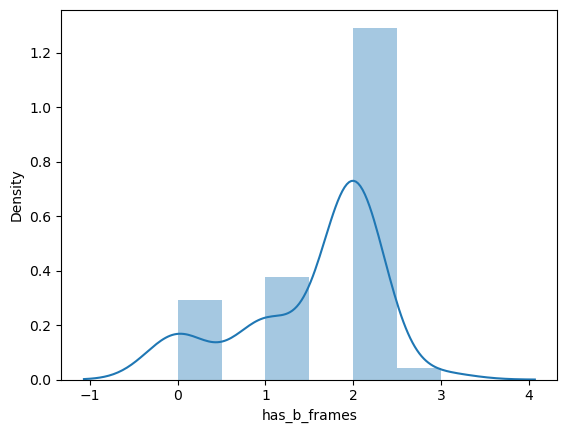

In [17]:
sns.distplot(tmp['has_b_frames'])
print("Skewness: %f" % tmp['has_b_frames'].skew())
print("Kurtosis: %f" % tmp['has_b_frames'].kurt())

Skewness: 0.382721
Kurtosis: -0.666320


/home/raz/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


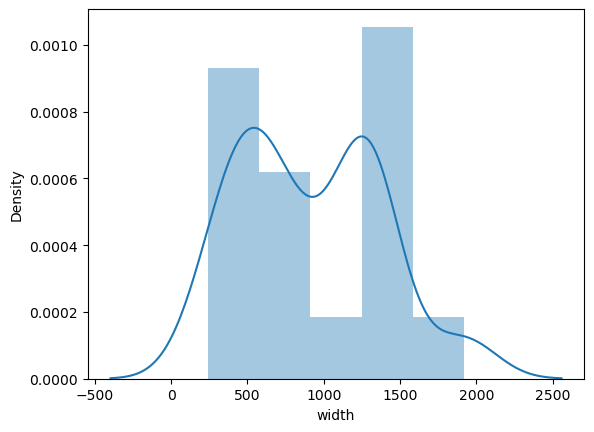

In [18]:
sns.distplot(tmp['width'])
print("Skewness: %f" % tmp['width'].skew())
print("Kurtosis: %f" % tmp['width'].kurt())

/home/raz/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.107058
Kurtosis: -0.040207


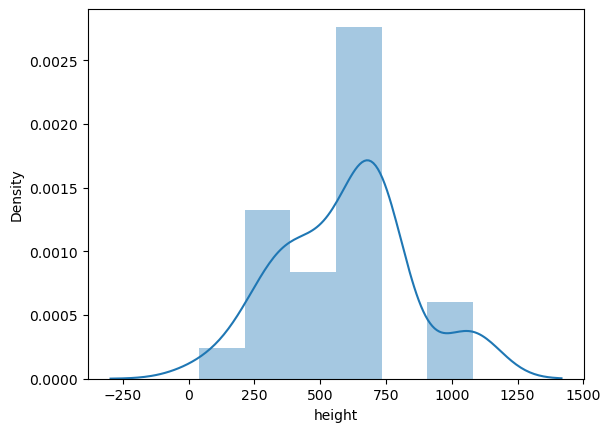

In [19]:
sns.distplot(tmp['height'])
print("Skewness: %f" % tmp['height'].skew())
print("Kurtosis: %f" % tmp['height'].kurt())

/home/raz/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.018152
Kurtosis: -0.035136


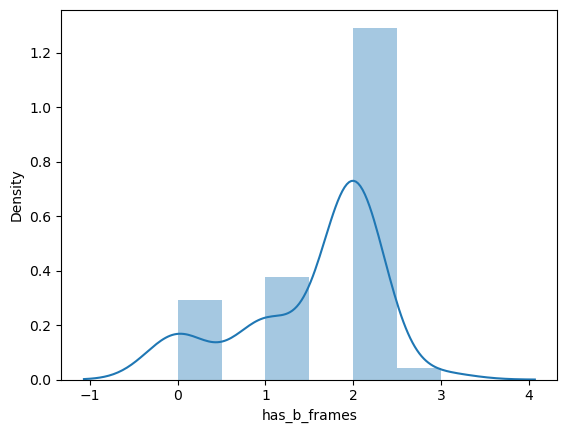

In [20]:
sns.distplot(tmp['has_b_frames'])
print("Skewness: %f" % tmp['has_b_frames'].skew())
print("Kurtosis: %f" % tmp['has_b_frames'].kurt())

## Memory Heat Map (MHM)
According to the article:
http://www.cs.yale.edu/homes/yoon-man-ki/DAC2015_MemoryHeatMap.pdf ,
The efficiency can be seen in the Memory Heat Map (MHM) to characterize the memory behavior of the operating system and to identify an anomaly in a real-time system.

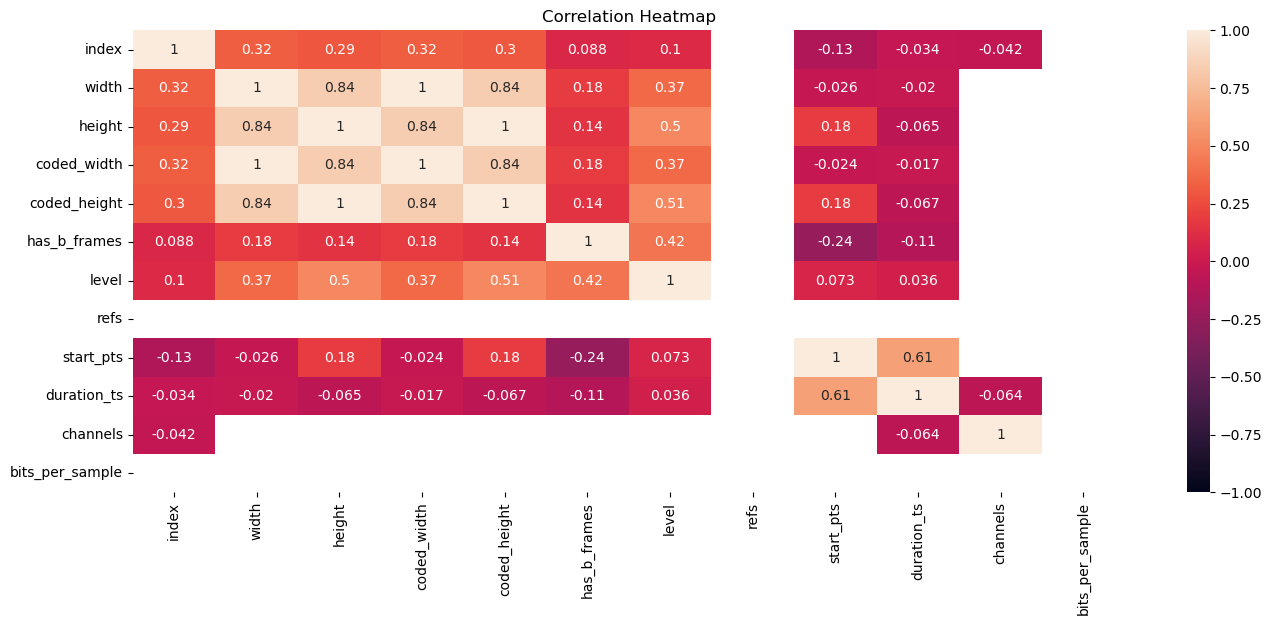

In [21]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(tmp.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

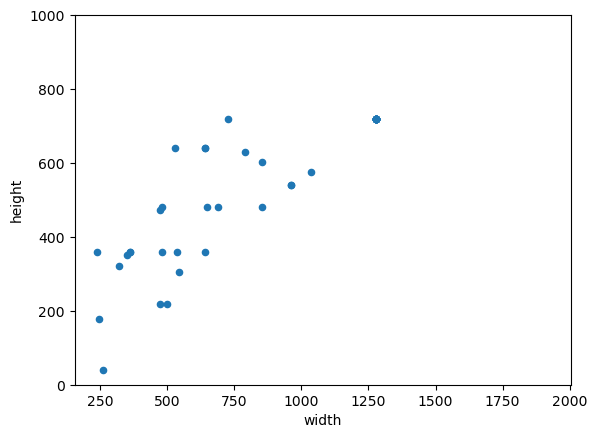

In [22]:
#scatter plot totalbsmtsf/saleprice
var = 'width'
data = pd.concat([tmp['height'], tmp[var]], axis=1)
data.plot.scatter(x=var, y='height', ylim=(0,1000));

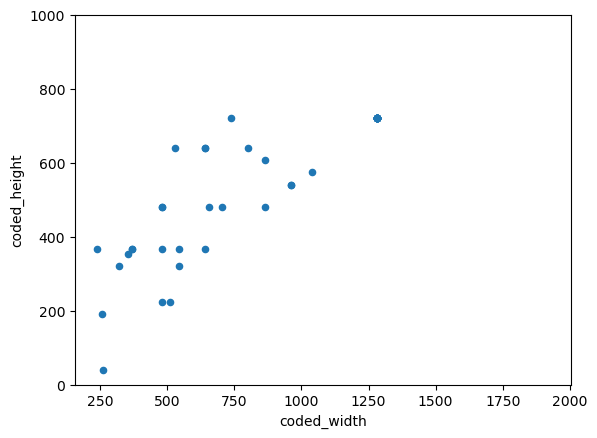

In [23]:
#scatter plot totalbsmtsf/saleprice
var = 'coded_width'        
data = pd.concat([tmp['coded_height'], tmp[var]], axis=1)
data.plot.scatter(x=var, y='coded_height', ylim=(0,1000));

## Reading Videos using OpenCV-Frame rate
Frame rate is the measurement of how quickly a number of frames appears within a second, which is why it's also called FPS (frames per second).

In [24]:

!pip install opencv-python

In [25]:

import cv2

we want to check for the avg_frame_rate parameter of the desired video stream. If the value of this parameter is a fraction like this

"avg_frame_rate": "1205285219/50270287"
with a denominator that is not 1 then the video file *has* a variable frame rate.

If the value is like this

"avg_frame_rate": "25/1" 
with a denominator that is 1 then the video file  *has no* a variable frame rate.

we need to check if the stream has a constant frame rate.

https://superuser.com/questions/1487401/how-can-i-tell-if-a-video-has-a-variable-frame-rate

In [27]:
files = Path("/home/raz/Downloads/mal_mp4/mal_mp4").glob('*')
for file in files:
    head, tail =os.path.split(file)
    print("----------------------------------------------------------------------------------------")
    print(tail)
    info=ffmpeg.probe(file)
    print(f"duration={info['format']['duration']}")
    print(f"framerate={info['streams'][0]['avg_frame_rate']}")

----------------------------------------------------------------------------------------
32f0219a692eb44353a279a19d276d7e635425ef40b791fb2d7fbd5901b2086c
duration=8.987000
framerate=30/1
----------------------------------------------------------------------------------------
5aa9b4c0cb45c5c16f1d930f6d25231f067e88094fff15b38dbec061236520ed
duration=10.043367
framerate=0/0
----------------------------------------------------------------------------------------
0f6bf20fbab3ab0a9f47b076810cfa6461b044f7aa9bf12e9f0814f2b7402a44
duration=9.759000
framerate=1474560/27817
----------------------------------------------------------------------------------------
1f3a3a7337d4166803cdcb29aee69989d1dc2b28b8750e987397e0c4843d38ea
duration=9.558345
framerate=66360/1147
----------------------------------------------------------------------------------------
e5f1b5af79c348ed96bacec94e35c7513db3ec600105f91b4a0f9661f3728ab4
duration=1.856000
framerate=30/1
--------------------------------------------------